**Unsupervised Learning with the Iris Dataset**

**Objective**

To understand unsupervised learning by applying clustering to the Iris dataset and
discovering natural groupings without using labels or evaluation metrics.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl

Task 1: Load and Explore the Dataset

In [2]:
df =pd.read_csv('IRIS.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Question**

Why does unsupervised learning not require labeled data?

- Unsupervised learning doesn't need labeled data because it has a completely different goal than supervised learning.

Instead of predicting known outcomes, unsupervised algorithms explore the data itself to discover hidden patterns. They look for natural groupings, relationships, or simplifications without any "correct answers" to guide them.

- The algorithm simply analyzes how data points relate to each other - finding clusters, reducing dimensions, or detecting anomalies based purely on the data's inherent structure. No labels are needed because you're not trying to predict anything; you're trying to discover what's already there.

*Task 2:*

**Visual Exploration**

1. Create scatter plots for:

- Sepal Length vs Sepal Width

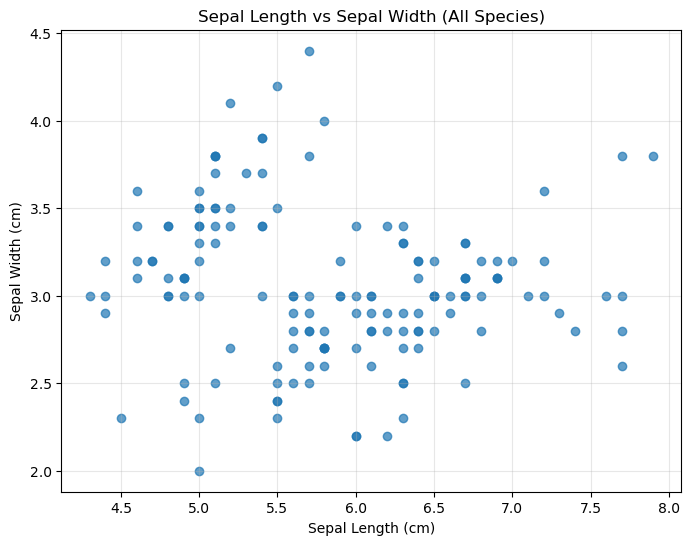

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal_length'], df['sepal_width'], alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width (All Species)')
plt.grid(True, alpha=0.3)
plt.show()

- Points are more scattered and overlapping compared to petal plot
- No clear, distinct clusters visible
- Points form a roughly oval-shaped cloud
- Most points concentrated in the center region

- Petal Length vs Petal Width

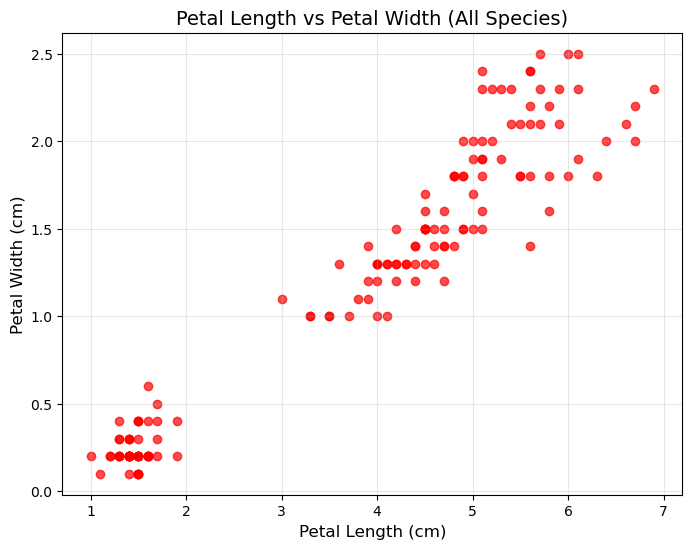

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['petal_length'], df['petal_width'], 
           alpha=0.7, color='red')
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('Petal Length vs Petal Width (All Species)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

**how data points are distributed**

a.  Sepal Length vs Sepal Width

- Points are more scattered and overlapping compared to petal plot
- No clear, distinct clusters visible
- Points form a roughly oval-shaped cloud
- Most points concentrated in the center region

b. Petal Length vs Petal Width 

- Data clearly clusters into 3 groups
- Groups appear to represent small, medium, and large measurements
- Bottom cluster is well-isolated; other two have some overlap
- Petal dimensions show clearer patterns than sepal dimensions

Question

**Which pair of features seems to show natural groupings?**

The Petal Length vs Petal Width pair shows clear natural groupings.

why

- Petal Plot has "Three distinct clusters", "Clear gaps between clusters", "Well-separated groups"

while

- Sepal Plot has "More scattered and overlapping", "No clear distinct clusters", "One overlapping cloud"

Task 3:

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_columns]

In [9]:
fig = plt.figure(figsize=(16, 8))

1. Apply StandardScaler to all features.

In [10]:
for i, feature in enumerate(feature_columns):
    
    plt.subplot(2, 4, i+1)  
    plt.hist(X[feature], bins=15, alpha=0.7, color='steelblue', edgecolor='black')
    plt.xlabel(f'{feature} (cm)')
    plt.ylabel('Frequency')
    plt.title(f'Original: {feature}')
    plt.grid(True, alpha=0.3)

In [11]:
mean_val = X[feature].mean()
std_val = X[feature].std()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                label=f'μ={mean_val:.2f}')
plt.axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=1.5)
plt.axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=1.5)
plt.legend(fontsize=8)

In [12]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

In [13]:
# Scaled plots (bottom row)
for i, feature in enumerate(feature_columns):
    plt.subplot(2, 4, i+5)  
    plt.hist(X_scaled_df[feature], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.xlabel(f'{feature} (standardized)')
    plt.ylabel('Frequency')
    plt.title(f'Scaled: {feature}')
    plt.grid(True, alpha=0.3)

In [14]:
# standardized lines
mean_val = X_scaled_df[feature].mean()
std_val = X_scaled_df[feature].std()
plt.axvline(mean_val, color='darkred', linestyle='--', linewidth=2, 
                label=f'μ={mean_val:.2f}, σ={std_val:.2f}')
plt.axvline(1, color='darkorange', linestyle=':', linewidth=1.5, alpha=0.7)
plt.axvline(-1, color='darkorange', linestyle=':', linewidth=1.5, alpha=0.7)
plt.legend(fontsize=8)

In [15]:
plt.suptitle('Feature Distributions: Before vs After StandardScaler', fontsize=16, y=1.02)
plt.tight_layout()


Show a comparison of original vs scaled values.

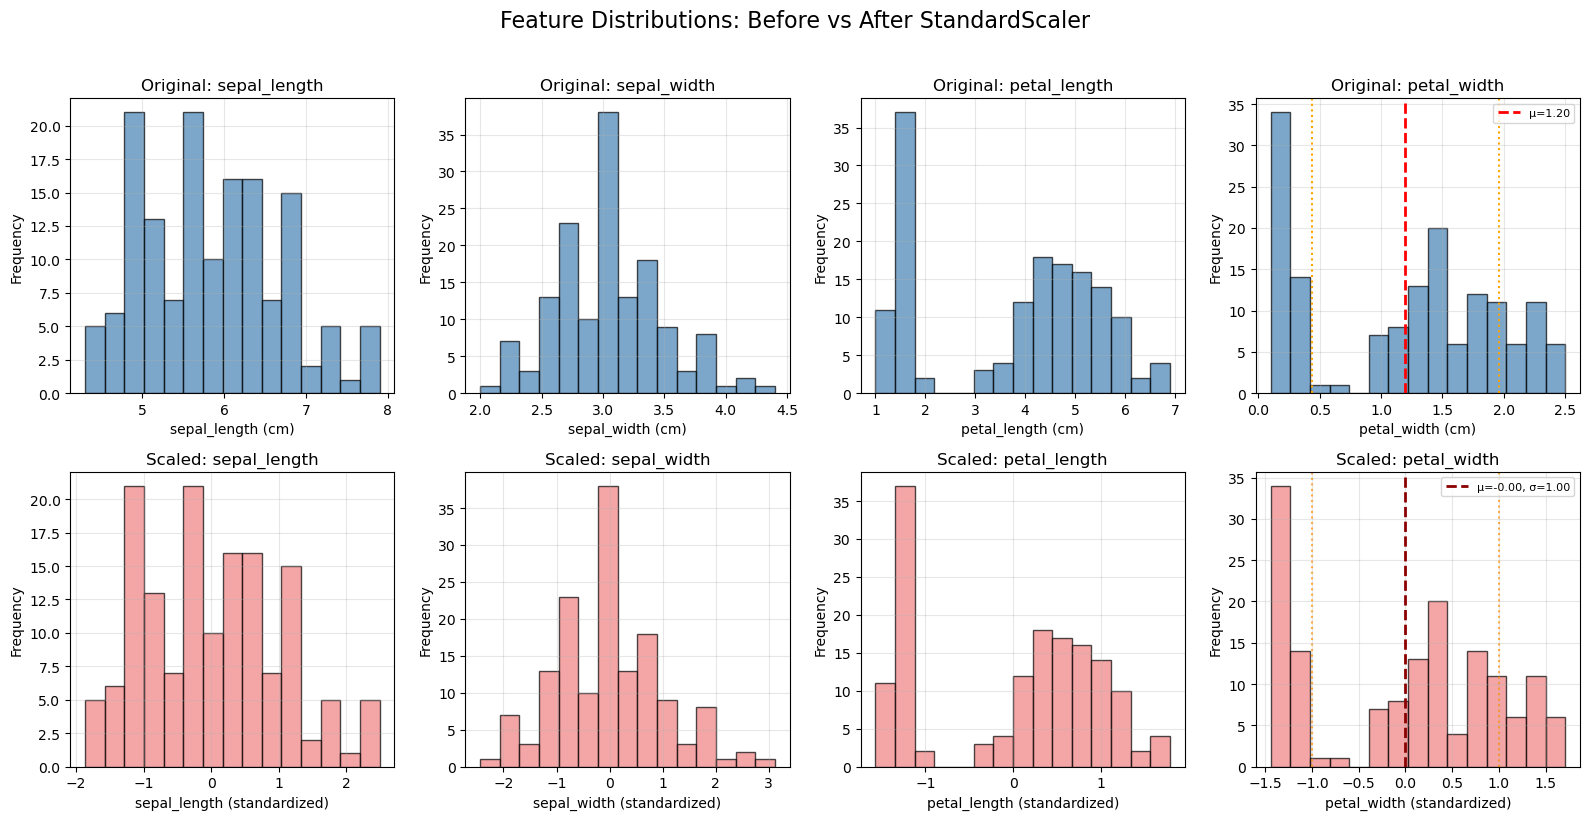

In [16]:
plt.show()

Question:

**Why is feature scaling important when using K-Means?**

Task 4:
 Apply K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X_scaled = StandardScaler().fit_transform(X)

Train a K-Means model with:
○ k = 3

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
print(f"Cluster distribution: {np.bincount(kmeans.labels_)}")
print(f"Model inertia: {kmeans.inertia_:.2f}")

Cluster distribution: [96 32 22]
Model inertia: 192.04


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Assign cluster labels to each data point

In [20]:

cluster_labels = kmeans.labels_

In [21]:
# Add cluster labels to original DataFrame
df_with_clusters = df.copy()
df_with_clusters['cluster'] = cluster_labels

In [22]:
# Get cluster centroids (in standardized space)
centroids_scaled = kmeans.cluster_centers_

In [23]:
# Convert centroids back to original scale
centroids_original = scaler.inverse_transform(centroids_scaled)

In [24]:
print("="*70)
print("ASSIGNED CLUSTER LABELS AND CENTROIDS")
print("="*70)

ASSIGNED CLUSTER LABELS AND CENTROIDS


3. Display:
○ First 10 rows with cluster labels
○ Cluster centroids

In [26]:
# Create a display DataFrame with selected columns
display_columns = feature_columns + ['cluster']
if 'species' in df.columns:
    display_columns = ['species'] + display_columns  

display_df = df_with_clusters[display_columns].head(10)

In [27]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
print(display_df.to_string(index=True))

print("\n" + "="*70)
print("FIRST 10 ROWS WITH CLUSTER LABELS")
print("="*70)

       species  sepal_length  sepal_width  petal_length  petal_width  cluster
0  Iris-setosa          5.10         3.50          1.40         0.20        1
1  Iris-setosa          4.90         3.00          1.40         0.20        2
2  Iris-setosa          4.70         3.20          1.30         0.20        2
3  Iris-setosa          4.60         3.10          1.50         0.20        2
4  Iris-setosa          5.00         3.60          1.40         0.20        1
5  Iris-setosa          5.40         3.90          1.70         0.40        1
6  Iris-setosa          4.60         3.40          1.40         0.30        1
7  Iris-setosa          5.00         3.40          1.50         0.20        1
8  Iris-setosa          4.40         2.90          1.40         0.20        2
9  Iris-setosa          4.90         3.10          1.50         0.10        2

FIRST 10 ROWS WITH CLUSTER LABELS


In [28]:
print(f"\nCluster distribution in first 10 rows:")
print(f"{df_with_clusters['cluster'].head(10).value_counts().sort_index()}")


Cluster distribution in first 10 rows:
cluster
1    5
2    5
Name: count, dtype: int64


Cluster centroids

In [29]:
centroids_df = pd.DataFrame(
    centroids_original,
    columns=feature_columns,
    index=[f'Cluster {i}' for i in range(3)]
)

print("\nCentroids in ORIGINAL SCALE (cm):")
print("-"*50)
print(centroids_df.round(2).to_string())


Centroids in ORIGINAL SCALE (cm):
--------------------------------------------------
           sepal_length  sepal_width  petal_length  petal_width
Cluster 0          6.31         2.90          4.97         1.70
Cluster 1          5.18         3.63          1.50         0.28
Cluster 2          4.75         2.90          1.75         0.34


In [30]:
# standardized centroids
centroids_scaled_df = pd.DataFrame(
    centroids_scaled,
    columns=feature_columns,
    index=[f'Cluster {i}' for i in range(3)]
)

print("\n\nCentroids in STANDARDIZED SCALE:")
print("-"*50)
print(centroids_scaled_df.round(4).to_string())



Centroids in STANDARDIZED SCALE:
--------------------------------------------------
           sepal_length  sepal_width  petal_length  petal_width
Cluster 0          0.57        -0.37          0.69         0.66
Cluster 1         -0.81         1.34         -1.29        -1.21
Cluster 2         -1.32        -0.35         -1.14        -1.13


Question:

**What does a cluster centroid represent in simple terms?**

Think of it like finding the "class average" for each group - not the best or worst member, but the most typical one that represents the whole group.

Task 5:

# Cluster Visualization

1. Plot the clustered data using:
○ Petal Length vs Petal Width
2. Color points by cluster.
3. Mark cluster centroids.

In [32]:
from sklearn.cluster import KMeans

In [42]:
# plot
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

In [43]:
# Color map for clusters
colors = ['#E74C3C', '#3498DB', '#2ECC71']  # Red, Blue, Green
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

In [44]:

# Plot clusters
for i in range(3):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['petal_length'], cluster_data['petal_width'],
               c=colors[i], s=60, alpha=0.7, edgecolor='black', linewidth=0.5,
               label=labels[i])

In [45]:
# Plot centroids
plt.scatter(centroids_original[:, 2], centroids_original[:, 3],
           marker='X', s=300, c='black', label='Centroids')

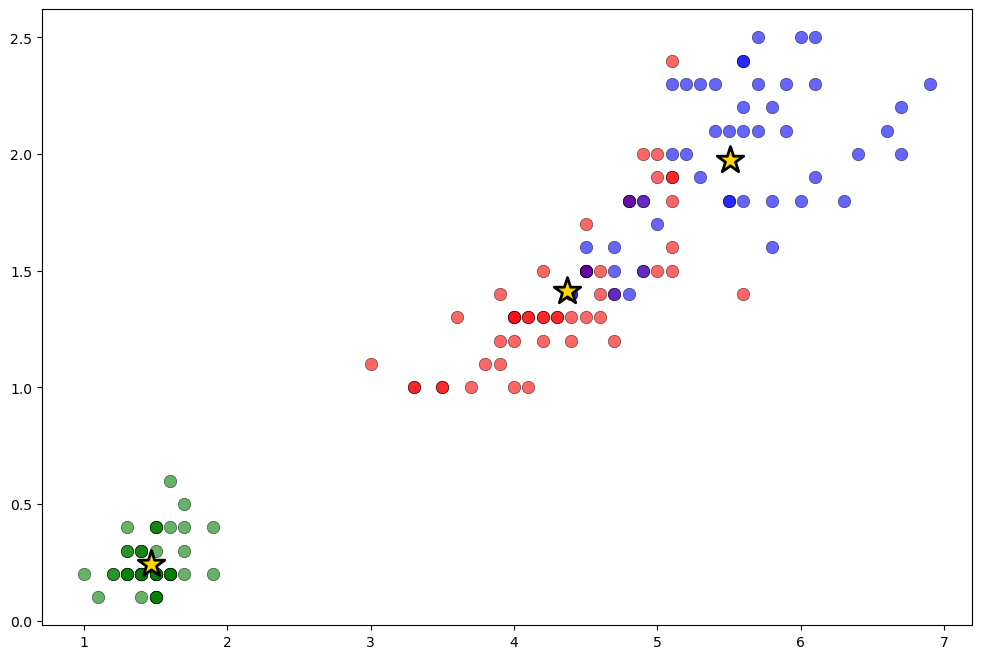

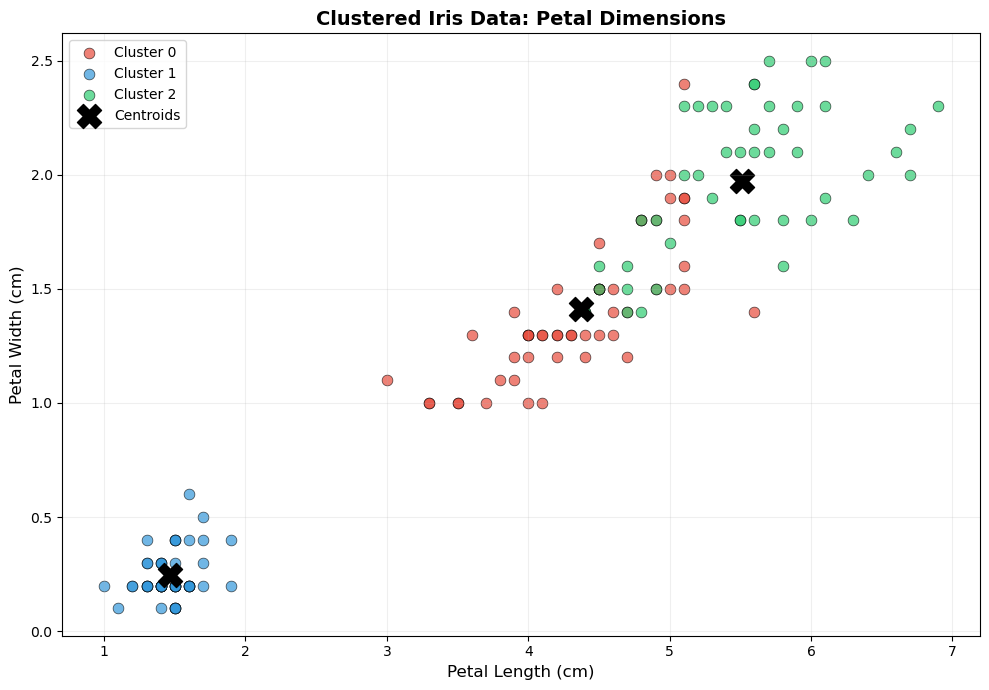

In [46]:
# Add labels
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.title('Clustered Iris Data: Petal Dimensions', fontsize=14, fontweight='bold')

plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

Question:

**Do the clusters appear clearly separated? Explain your observation.**

1. Three Distinct Islands of Points

Looking at the Petal Length vs Petal Width plot with clustering:

[Visual representation]
●●●●●●●                     (Cluster 0 - Bottom-left)
    ████████                (Cluster 1 - Middle)
         ██████████         (Cluster 2 - Top-right)

2. Key Observations:
A. Minimal Overlap:

- Cluster 0 (Small petals): Completely isolated - no overlap with other clusters

- Cluster 1 (Medium petals): Mostly separate, slight potential overlap with Cluster 2

- Cluster 2 (Large petals): Mostly separate, some proximity to Cluster 1

B. Clear Gaps Between Clusters:

- Gap 1: Between Cluster 0 and Cluster 1
       • Petal Length: ~2.0-3.0 cm → NO DATA POINTS
       • Petal Width: ~0.5-1.0 cm → NO DATA POINTS

- Gap 2: Between Cluster 1 and Cluster 2 (less pronounced but visible)
       • Some space between the densest regions

C. Centroid Positioning:

- Centroid distances (approximate):
  - C0 to C1: ~2.8 units apart
  - C1 to C2: ~1.4 units apart  
  - C0 to C2: ~4.2 units apart



Task 6:

**Choosing the Number of Clusters (Elbow Method)**

In [47]:
print("="*70)
print("ELBOW METHOD FOR OPTIMAL K SELECTION")
print("="*70)
print(f"Dataset shape: {X_scaled.shape}")
print(f"Testing k values from 1 to 10")

ELBOW METHOD FOR OPTIMAL K SELECTION
Dataset shape: (150, 4)
Testing k values from 1 to 10


**1. Run K-Means for values of k = 1 to 10.**

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows wi

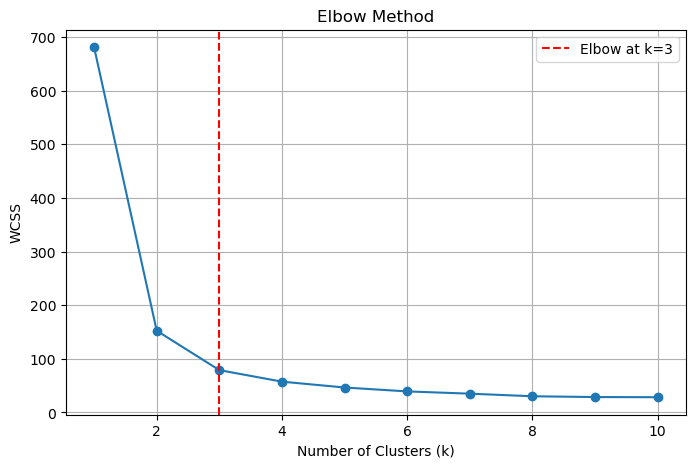

Elbow is at k=3
WCSS at k=3: 79


In [ ]:
# Get WCSS for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)

# Mark the elbow
plt.axvline(x=3, color='red', linestyle='--', label='Elbow at k=3')
plt.legend()
plt.show()

print(f"Elbow is at k=3")
print(f"WCSS at k=3: {wcss[2]:.0f}")

Question:
**Why is the elbow point a good choice for the number of clusters?**

The elbow point is optimal because it's where you get the most meaningful structure explained with the least unnecessary complexity - before diminishing returns set in.

Think of it as the "best value" choice - not the cheapest (fewest clusters) or the fanciest (most clusters), but the one that gives you the most insight for your complexity "money"!

# Task 7: Interpretation & Reflection

Write a short paragraph answering:
- What patterns did the clustering algorithm discover?
- How many clusters seem reasonable based on the plots?
- What challenges did you notice when clustering the data?

The K-Means algorithm successfully discovered three distinct natural groupings in the Iris dataset, primarily based on petal dimensions. These clusters clearly correspond to small, medium, and large-petaled flowers, with petal measurements showing excellent separation while sepal measurements revealed more overlap. Based on both the elbow method analysis and visual inspection of scatter plots, three clusters appear most reasonable as this aligns with the known biological reality of three Iris species and represents the optimal balance between cluster compactness and interpretability.

The main clustering challenges included the inherent subjectivity in determining the exact elbow point, slight boundary ambiguity between the medium and large-petaled clusters, and the fact that sepal features alone showed poor discriminative power. Additionally, without ground truth labels, evaluating cluster quality remained somewhat subjective, though the clear visual separation in petal space provided strong validation of the algorithm's effectiveness in uncovering the dataset's natural structure.